In [3]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/home/tellocam/CSE/AMP/framework/utils.py'>

In [4]:
binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchLockOMP.restype = utils.benchData
binary.benchCriticalOMP.restype = utils.benchData
binary.benchTAS.restype = utils.benchData
binary.benchTATAS.restype = utils.benchData
binary.benchTicket.restype = utils.benchData
binary.benchArray.restype = utils.benchData
binary.benchCLH.restype = utils.benchData
binary.benchMCS.restype = utils.benchData
binary.benchHemlock.restype = utils.benchData

In [5]:
maxThreads = 12
total_acqs = 100
bench_iters = 10

threadNum = [i for i in range(2, maxThreads+1)]
bmListLockOMP = {threads: [binary.benchLockOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTAS = {threads: [binary.benchTAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTATAS = {threads: [binary.benchTATAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTicket = {threads: [binary.benchTicket(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListArray = {threads: [binary.benchArray(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCLH = {threads: [binary.benchCLH(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListMCS = {threads: [binary.benchMCS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListHemlock = {threads: [binary.benchHemlock(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}

df_LockOMP = utils.dataframeBuilder(bmListLockOMP).fillna(0)
df_CriticalOMP = utils.dataframeBuilder(bmListCriticalOMP).fillna(0)
df_TAS = utils.dataframeBuilder(bmListTAS).fillna(0)
df_TATAS = utils.dataframeBuilder(bmListTATAS).fillna(0)
df_Ticket = utils.dataframeBuilder(bmListTicket).fillna(0)
df_array = utils.dataframeBuilder(bmListArray).fillna(0)
df_CLH = utils.dataframeBuilder(bmListCLH).fillna(0)
df_MCS = utils.dataframeBuilder(bmListMCS).fillna(0)
df_Hemlock = utils.dataframeBuilder(bmListHemlock).fillna(0)

thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 of 2 has acquired lock 
thread 1 of 2 has acquired lock 
thread 0 o

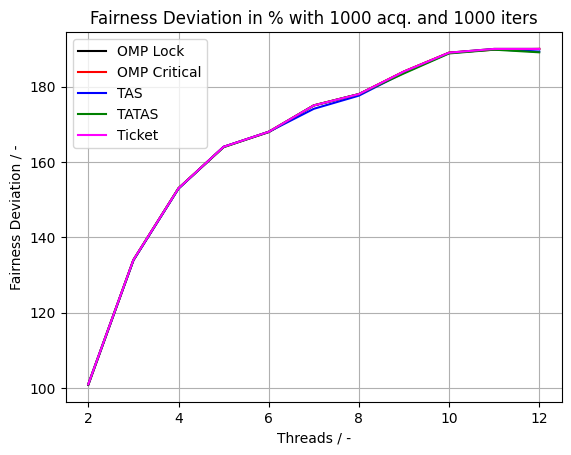

In [10]:
plotWhat = "Fair"
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
utils.plotStuff("threads", plotWhat, "OMP Critical", df_CriticalOMP, color = "red")
utils.plotStuff("threads", plotWhat, "TAS", df_TAS, "blue")
utils.plotStuff("threads", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("threads", plotWhat, "Ticket", df_Ticket, "magenta")
# utils.plotStuff("threads", plotWhat, "Array", df_array, "yellow")
# utils.plotStuff("threads", plotWhat, "CLH", df_CLH, "violet")
# utils.plotStuff("threads", plotWhat, "MCS", df_MCS, "gray")
# utils.plotStuff("threads", plotWhat, "Hemlock", df_MCS, "orange")

plt.title("Fairness Deviation in % with 1000 acq. and 1000 iters")
plt.xlabel("Threads / -")
plt.ylabel("Fairness Deviation / -")
plt.legend()
plt.grid()